# Screw and Nut Bolt Classification

## Libraries

In [4]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image
import os
from skimage import io
import splitfolders
import glob
import cv2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization

## Folder Path

In [5]:
DATASET_PATH = '/home/ad.rapidops.com/vyom.vora/Nut and bolt/data'
data_class = ['Screw', 'nut and bolt']

In [6]:
#printing the location of all the images of screws 
mechanical_parths_path = os.path.join(DATASET_PATH, data_class[1], '*')
print(mechanical_parths_path)

/home/ad.rapidops.com/vyom.vora/Nut and bolt/data/nut and bolt/*


In [7]:
mechanical_parths_path = glob.glob(mechanical_parths_path)
print(mechanical_parths_path[1])

/home/ad.rapidops.com/vyom.vora/Nut and bolt/data/nut and bolt/bolt-nut-isolated-on-white-260nw-250800988.jpg


In [8]:
mechanical_parths_path = os.path.join(DATASET_PATH, data_class[0], '*')
mechanical_parths_path = glob.glob(mechanical_parths_path)

## Reading Image

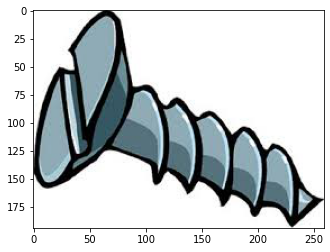

In [9]:
image = io.imread(mechanical_parths_path[14])
plt.imshow(image)

In [10]:
print(image.shape)

(194, 259, 3)


In [11]:
len(mechanical_parths_path)

59

## Spliting the Data into Train and Validation Data

In [12]:
splitfolders.ratio(DATASET_PATH, output="output",
    seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

Copying files: 161 files [00:00, 10535.49 files/s]


In [13]:
# os.makedirs('output')
# os.makedirs('output/train')
# os.makedirs('output/val')

## Image Processing and Augmentation

In [14]:
IMAGE_SIZE = [224, 224]

In [15]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
training_set = train_datagen.flow_from_directory('/home/ad.rapidops.com/vyom.vora/Nut and bolt/output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 shuffle=True)

Found 122 images belonging to 2 classes.


In [18]:
test_set = test_datagen.flow_from_directory('/home/ad.rapidops.com/vyom.vora/Nut and bolt/output/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 33 images belonging to 2 classes.


In [19]:
train_datagen

## Convolution layers

In [20]:
training_set.class_indices

{'Screw': 0, 'nut and bolt': 1}

In [21]:
def base_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3,3),activation='relu',input_shape=(224, 224, 3)))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [22]:
model = base_model()

2022-07-12 14:39:20.860554: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 14:39:20.860781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 14:39:20.918281: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 14:39:20.918475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-12 14:39:20.918629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 16)                2

In [24]:
history = model.fit_generator(training_set, 
                    epochs=25, 
                    steps_per_epoch = training_set.n//training_set.batch_size, 
                    validation_data=test_set,
                    validation_steps = test_set.n//test_set.batch_size)


/tmp/ipykernel_37413/3700627378.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(training_set,


Epoch 1/25


2022-07-12 14:39:24.019581: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401


3/3 [==============================] - 4s 263ms/step - loss: 2.1426 - accuracy: 0.5222 - val_loss: 0.8267 - val_accuracy: 0.3750
Epoch 2/25
3/3 [==============================] - 1s 255ms/step - loss: 0.6968 - accuracy: 0.5625 - val_loss: 0.6836 - val_accuracy: 0.6250
Epoch 3/25
3/3 [==============================] - 1s 262ms/step - loss: 0.6860 - accuracy: 0.6111 - val_loss: 0.6552 - val_accuracy: 0.6250
Epoch 4/25
3/3 [==============================] - 1s 247ms/step - loss: 0.6867 - accuracy: 0.5778 - val_loss: 0.6545 - val_accuracy: 0.6562
Epoch 5/25
3/3 [==============================] - 1s 253ms/step - loss: 0.6681 - accuracy: 0.6111 - val_loss: 0.6434 - val_accuracy: 0.6250
Epoch 6/25
3/3 [==============================] - 1s 241ms/step - loss: 0.6265 - accuracy: 0.6354 - val_loss: 0.5690 - val_accuracy: 0.6562
Epoch 7/25
3/3 [==============================] - 1s 253ms/step - loss: 0.6328 - accuracy: 0.6556 - val_loss: 0.6204 - val_accuracy: 0.7500
Epoch 8/25
3/3 [===============

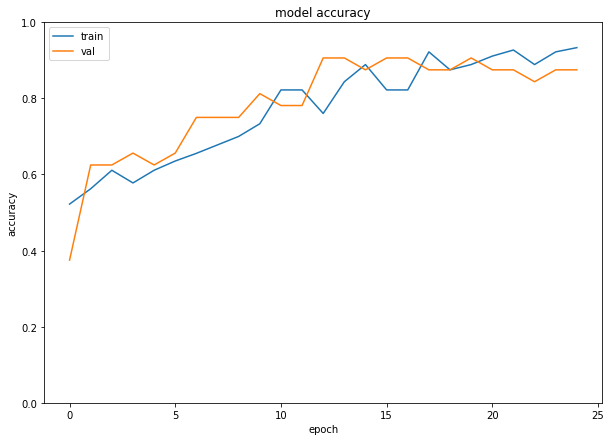

In [25]:
plt.figure(figsize = (10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0,1)
plt.show()

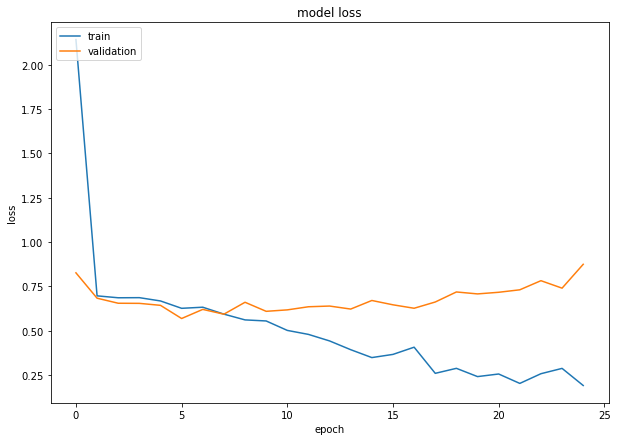

In [26]:
plt.figure(figsize = (10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [28]:
# model.save('/content/drive/MyDrive/nut_screw classification/base_nut.h5')

In [29]:
# image_path = '/content/screw_1.jpg'

# def classify(img_path):
#     img = cv2.imread(image_path, cv2.IMREAD_COLOR)
#     img_array = img.img_to_array(img)

#     # img_batch = np.expand_dims(img_array, axis=0)

#     # model = tf.keras.applications.resnet50.ResNet50()
#     prediction = model.predict(img)

#     # print(decode_predictions(prediction, top=3)[0])
# image_path = '/content/screw_1.jpg'
# classify(image_path)

In [ ]:
# def load_image(img_path, show=False):

#     img = image.load_img(img_path, target_size=(224, 224))
#     img_tensor = image.img_to_array(img)                    # (height, width, channels)
#     img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
#     img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

#     if show:
#         plt.imshow(img_tensor[0])                           
#         plt.axis('off')
#         plt.show()

#     return img_tensor

In [ ]:
#  model = load_model("/content/drive/MyDrive/nut_screw classification/base_nut.h5")

In [ ]:
# img_path = '/content/screw_1.jpg'    # screw
#     # load a single image
# new_image = load_image(img_path)

#     # check prediction
# pred = model.predict(new_image)

In [ ]:
# print(pred)